In [1]:
# vgg16
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.applications.vgg16 import VGG16
from glob import glob
from keras.models import Model
import tensorflow 

C:\Users\SUBARTHIN\.conda\envs\tf\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:

IMAGE_SIZE = [224, 224]

In [5]:
#Using VGG16 model with predefined imagenet weights
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
#finding number of individual files in train folder
folders = glob("C:/Users/SUBARTHIN/input/nike-adidas-and-converse-imaged/train/*")

In [7]:
#skipping training of layers
for layer in vgg.layers:
  layer.trainable = False
x = Flatten()(vgg.output)

In [8]:
# creating a dense layer with no. of neurons matching the no. of images
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
#model building
model = Model(inputs=vgg.input, outputs=prediction)

In [10]:
#summary of model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
#compilation
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# using Imagedatagenerator to scale normalize the images and generating more images from existing ones
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('C:/Users/SUBARTHIN/input/nike-adidas-and-converse-imaged/train',
                                                 target_size = (240, 240),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('C:/Users/SUBARTHIN/input/nike-adidas-and-converse-imaged/test',
                                            target_size = (240, 240),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 711 images belonging to 3 classes.
Found 114 images belonging to 3 classes.


In [13]:
#fitting and evaluating the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
23/23 [==============================] - 20s 526ms/step - loss: 1.0771 - accuracy: 0.5570 - val_loss: 0.6053 - val_accuracy: 0.7281
Epoch 2/20
23/23 [==============================] - 7s 319ms/step - loss: 0.5470 - accuracy: 0.7609 - val_loss: 0.6726 - val_accuracy: 0.7018
Epoch 3/20
23/23 [==============================] - 8s 328ms/step - loss: 0.3524 - accuracy: 0.8636 - val_loss: 0.4777 - val_accuracy: 0.8509
Epoch 4/20
23/23 [==============================] - 8s 322ms/step - loss: 0.2626 - accuracy: 0.9170 - val_loss: 0.5006 - val_accuracy: 0.8246
Epoch 5/20
23/23 [==============================] - 8s 322ms/step - loss: 0.2217 - accuracy: 0.9437 - val_loss: 0.4886 - val_accuracy: 0.8158
Epoch 6/20
23/23 [==============================] - 7s 322ms/step - loss: 0.1778 - accuracy: 0.9508 - val_loss: 0.4425 - val_accuracy: 0.8333
Epoch 7/20
23/23 [==============================] - 7s 320ms/step - loss: 0.1248 - accuracy: 0.9817 - val_loss: 0.4268 - val_accuracy: 0.8158
Epoch

In [15]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(training_set,steps_per_epoch=100, validation_data= test_set, validation_steps=10,epochs=100,callbacks=[checkpoint,early])

Epoch 1/100
100/100 [==============================] - 8s 77ms/step - loss: 0.0302 - accuracy: 1.0000 - val_loss: 0.3922 - val_accuracy: 0.8421


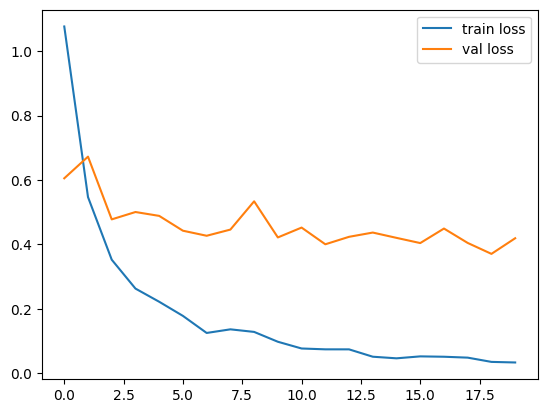

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

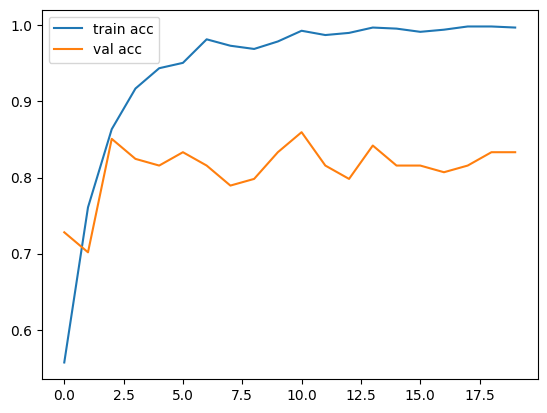

<Figure size 640x480 with 0 Axes>

In [17]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
import tensorflow as tf

from keras.models import load_model

model.save('shoe_classif.h5')